In [ ]:
# Install and import libraries
!pip install -q seaborn scikit-learn nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Encode labels: spam=1, ham=0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Define train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# TF-IDF Vectorization with English stopwords
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

,0
label,0
message,0


In [ ]:
df.columns

Index(['label', 'message'], dtype='object')

In [ ]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Convert the resulting columns to integer type
data_encoded = data_encoded.apply(pd.to_numeric, downcast='integer')

# Display the first few rows of the modified data
data_encoded.head()

,label,message_ &lt;#&gt; mins but i had to stop somewhere first.,message_ &lt;DECIMAL&gt; m but its not a common car here so its better to buy from china or asia. Or if i find it less expensive. I.ll holla,message_ and picking them up from various points,"message_ came to look at the flat, seems ok, in his 50s? * Is away alot wiv work. Got woman coming at 6.30 too.",message_ gonna let me know cos comes bak from holiday that day. is coming. Don't4get2text me number.,"message_ said kiss, kiss, i can't do the sound effects! He is a gorgeous man isn't he! Kind of person who needs a smile to brighten his day!","message_ says that he's quitting at least5times a day so i wudn't take much notice of that. Nah, she didn't mind. Are you gonna see him again? Do you want to come to taunton tonight? U can tell me all about !",message_ what number do u live at? Is it 11?,message_&lt;#&gt; am I think? Should say on syllabus,...,message_ÌÏ only send me the contents page...,message_ÌÏ predict wat time Ì_'ll finish buying?,message_ÌÏ ready then call me...,message_ÌÏ say until like dat i dun buy ericsson oso cannot oredi lar...,message_ÌÏ still attending da talks?,message_ÌÏ still got lessons? ÌÏ in sch?,message_ÌÏ takin linear algebra today?,message_ÌÏ thk of wat to eat tonight.,message_ÌÏ v ma fan...,message_ÌÏ wait 4 me in sch i finish ard 5..
0,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.drop(columns=df.columns[2:5])
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                        ('clf', LogisticRegression())])

pipeline_lr.fit(X_train, y_train)

# Make predictions on the test set
predictions_lr = pipeline_lr.predict(X_test)

# Evaluate the model (Optional - will be done in a separate step)
# print(classification_report(y_test, predictions_lr))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
featurer = CountVectorizer()
X_train_count = featurer.fit_transform(X_train.values)
X_train_count

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 58998 stored elements and shape (4457, 7701)>

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_count,y_train)

MultinomialNB()

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train_count, y_train)

LinearSVC()

In [ ]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train_count, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_auc_score

# MultinomialNB
auc_nb = roc_auc_score(y_test, y_prob_nb)
print(f"MultinomialNB AUC: {auc_nb:.2f}")

# Logistic Regression
auc_lr = roc_auc_score(y_test, y_prob_lr)
print(f"Logistic Regression AUC: {auc_lr:.2f}")

# SVM (decision_function used)
auc_svm = roc_auc_score(y_test, y_scores_svm)
print(f"SVM AUC: {auc_svm:.2f}")

MultinomialNB AUC: 0.98
Logistic Regression AUC: 0.99
SVM AUC: 0.98


/tmp/ipython-input-68-1895472270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x='Accuracy (%)', data=accuracy_data, palette='magma')


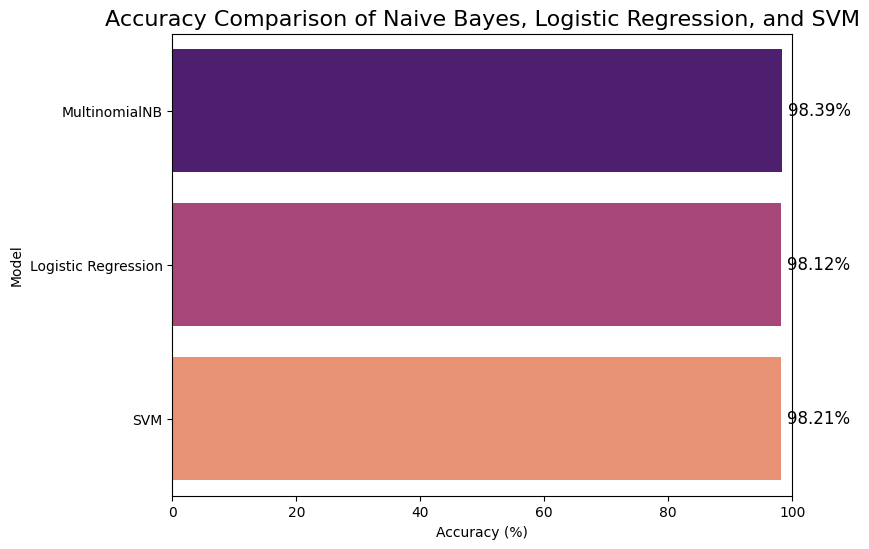

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(y='Model', x='Accuracy (%)', data=accuracy_data, palette='magma')
plt.title('Accuracy Comparison of Naive Bayes, Logistic Regression, and SVM', fontsize=16)
plt.xlabel('Accuracy (%)')
plt.xlim(0, 100)

# Annotate bars
for index, row in accuracy_data.iterrows():
    plt.text(row['Accuracy (%)'] + 1, index, f"{row['Accuracy (%)']:.2f}%", va='center', fontsize=12)

plt.show()


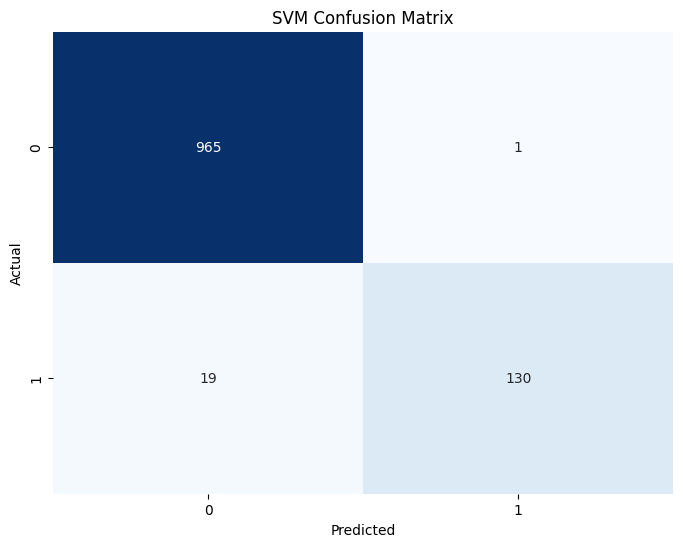

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions with the SVM model (trained in cell SwaCBKkRx1Lg on X_train_count)
svm_preds = svm_model.predict(X_test_count)

# Generate confusion matrix
cm = confusion_matrix(y_test, svm_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-70-2536311806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=category_counts, palette='pastel')


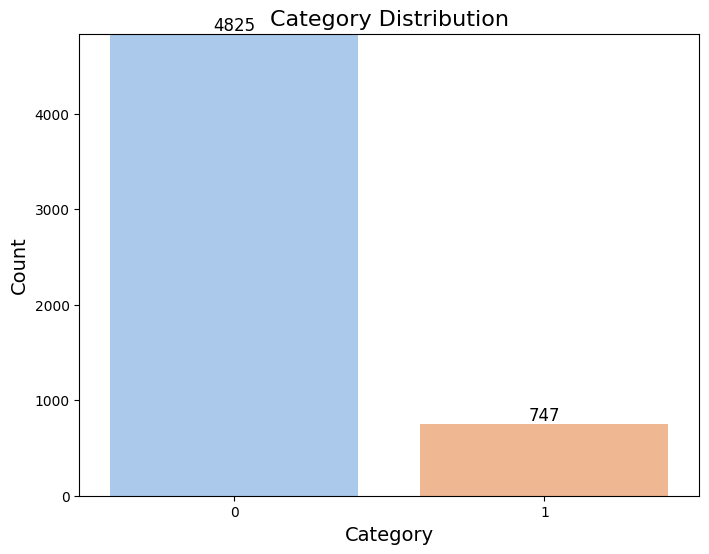

In [ ]:
# Category Distribution Bar Plot
category_counts = df['label'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=category_counts, palette='pastel')

# Titles and labels
plt.title('Category Distribution', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate bars with counts
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12, color='black')

plt.ylim(0, category_counts['Count'].max() + 10)  # Add some space above bars
plt.show()

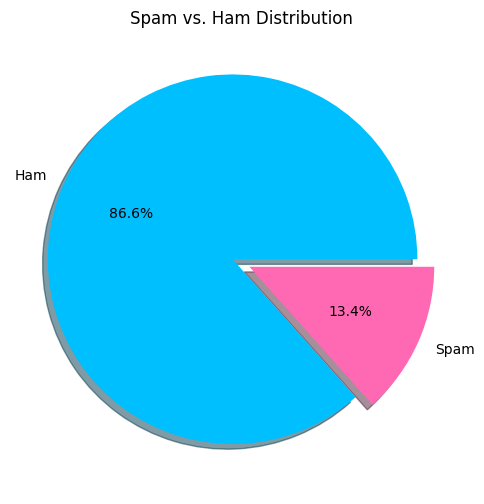

In [ ]:
plt.figure(figsize=(6,6))
counts = df['label'].value_counts()
plt.pie(counts, labels=['Ham', 'Spam'], autopct='%1.1f%%',
        colors=['#00BFFF', '#FF69B4'], explode=(0.05,0.05), shadow=True)
plt.title('Spam vs. Ham Distribution')
plt.show()


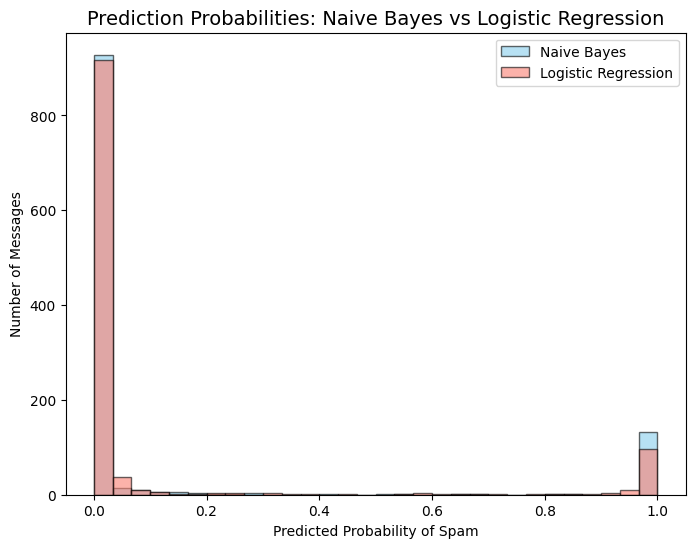

In [ ]:
# Get predicted probabilities for positive class
y_prob_nb = nb_model.predict_proba(X_test_count)[:,1]
y_prob_Lr = Lr_model.predict_proba(X_test_count)[:,1]

plt.figure(figsize=(8,6))
plt.hist(y_prob_nb, bins=30, alpha=0.6, label='Naive Bayes', color='skyblue', edgecolor='black')
plt.hist(y_prob_Lr, bins=30, alpha=0.6, label='Logistic Regression', color='salmon', edgecolor='black')
plt.title('Prediction Probabilities: Naive Bayes vs Logistic Regression', fontsize=14)
plt.xlabel('Predicted Probability of Spam')
plt.ylabel('Number of Messages')
plt.legend()
plt.show()

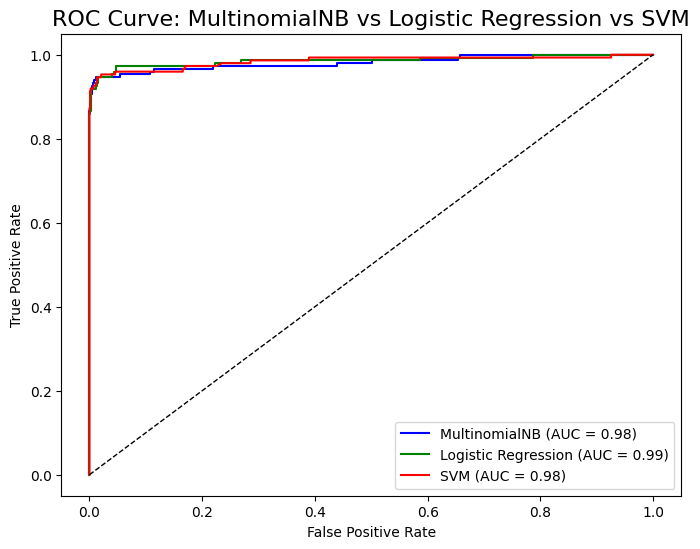

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

# ROC for MultinomialNB
y_prob_nb = nb_model.predict_proba(X_test_count)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'MultinomialNB (AUC = {roc_auc_nb:.2f})', color='blue')

# ROC for Logistic Regression
y_prob_lr = Lr_model.predict_proba(X_test_count)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='green')

# ROC for SVM (no predict_proba, so use decision_function)
from sklearn.preprocessing import label_binarize
y_scores_svm = svm_model.decision_function(X_test_count)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color='red')

# Plot details
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title('ROC Curve: MultinomialNB vs Logistic Regression vs SVM', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()